In [1]:
%config InlineBackend.figure_format = 'retina'
import os
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
'''
# Define data transformer
img_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# Read data and transform
dataset = MNIST(root='./data', download=True, train=True, transform=img_transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False)
x,_ = next(iter(dataloader))
'''

options = []
options.append(transforms.CenterCrop(160))
options.append(transforms.Resize((64,64)))
options.append(transforms.ToTensor())
options.append(transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)))
dataset = datasets.ImageFolder(os.getcwd(), transform=transforms.Compose(options))
loader = DataLoader(dataset=dataset, batch_size=64)
x,_ = next(iter(loader))

In [36]:
query_conv = nn.Conv2d(in_channels = 3 , out_channels = 1 , kernel_size= 1)
key_conv = nn.Conv2d(in_channels = 3 , out_channels = 1 , kernel_size= 1)
value_conv = nn.Conv2d(in_channels = 3 , out_channels = 3 , kernel_size= 1)
gamma = -0.1
softmax = nn.Softmax(dim=-1)

m_batchsize,C,width,height = x.size()
        
proj_query = query_conv(x).view(m_batchsize, -1, width*height).permute(0,2,1) # B * N * C
proj_key = key_conv(x).view(m_batchsize, -1, width*height) # B * C * N
energy = torch.bmm(proj_query, proj_key) # batch matrix-matrix product
attention = softmax(energy) # B * N * N
proj_value = value_conv(x).view(m_batchsize, -1, width*height) # B * C * N
out = torch.bmm(proj_value, attention.permute(0,2,1)) # batch matrix-matrix product
out = out.view(m_batchsize,C,width,height) # B * C * W * H
        
out1 = gamma*out + x

In [37]:
def plotts(index):
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(x[index].permute(1,2,0).detach().numpy())
    plt.subplot(132)
    plt.imshow(out[index].permute(1,2,0).detach().numpy())
    plt.subplot(133)
    plt.imshow(out1[index].permute(1,2,0).detach().numpy())
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


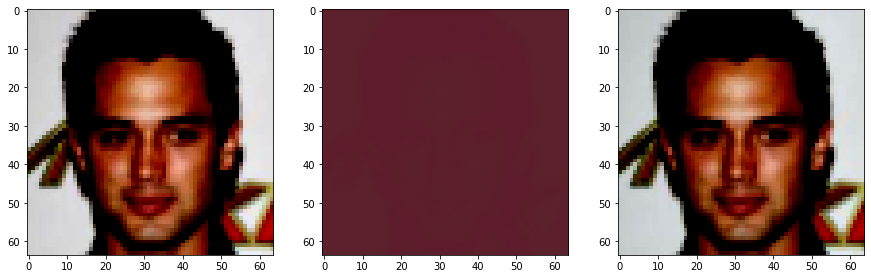

In [38]:
plotts(6)